# Reading in the data

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X, y = fetch_openml('mnist_784', version=1, cache=False, return_X_y=True)

In [2]:
X.shape

(70000, 784)

# 1. PCA Dimensionality Reduction

### a. How many components

Making a plot to look at the explained variance for each possible number of dimensions

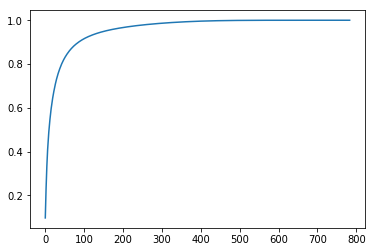

In [3]:
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)

The elbow looks like it occurs before 100 dimensions. So I'll replot it looking at only the first 100 dimensions.

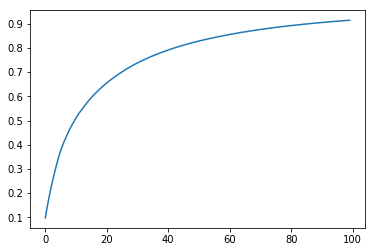

In [4]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)

It looks like there's an elbow around 50 dimensions. I want a square number to make it easy when I plot images. I'll check out the explained variance for 25, 36, ..., 81.

In [5]:
print(cum_ratio[24], cum_ratio[35], cum_ratio[48], cum_ratio[63], cum_ratio[80])

0.6929858641453971 0.7676150018960387 0.8222218319256195 0.8625548029417057 0.8924096738774924


The explained variance looks like it increases by a large amount at each step until the step from 49 to 64 dimensions. So I will go with 49 dimensions. This explains over 80% of the variance.

In [6]:
pca = PCA(n_components=49)
X_pca = pca.fit_transform(X)

### b. First two components

Plotting the first two components

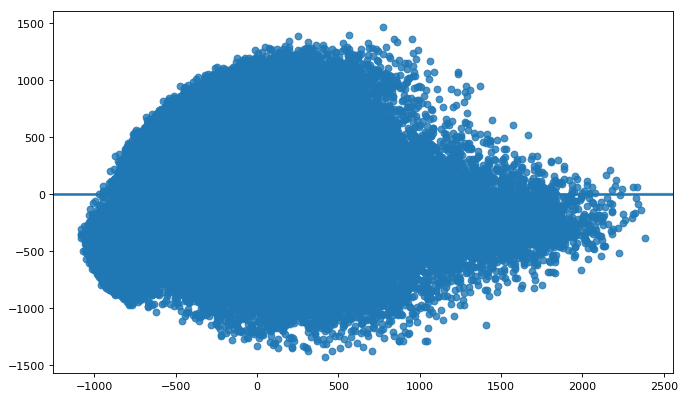

In [7]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.regplot(X_pca[:,0], X_pca[:,1])

The first two components do not look very related. There are no apparent trends. This makes sense because they are both supposed to explain a lot of the variance of the data together, so they should each be explaining different parts of the variance in the data.

### c. Why PCA

I want to use PCA because we originally started with 784 features. This is a ton and would take a long time to train a model on. It is also very hard to compare observations as being similar. Instead of using all the features as given to me originally, I can use PCA and project the features on to different axes that preserve information about the varinace and reduce the number of dimensions required to explain the data. In this case, I used PCA to get down to 49 dimensions while still explaining over 80% of the variance which makes it a lot easier to compare observations.

One of the drawbacks is that I do not have all of the data explained in these 49 features. Another drawback is that the "features" are hard to interpret because they were selected by how they best explained the variance, meaning that they are not the same features as we had to begin with.

### d. Plotting Images

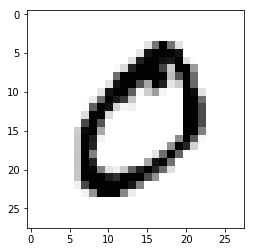

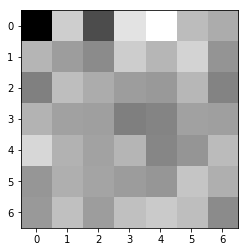

In [8]:
plt.imshow(X[1].reshape((28,28)), cmap='Greys')
plt.figure()
plt.imshow(X_pca[1].reshape((7,7)), cmap='Greys')

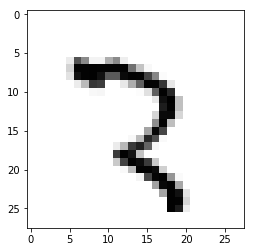

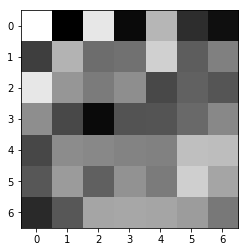

In [9]:
plt.imshow(X[500].reshape((28,28)), cmap='Greys')
plt.figure()
plt.imshow(X_pca[500].reshape((7,7)), cmap='Greys')

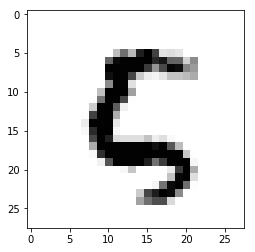

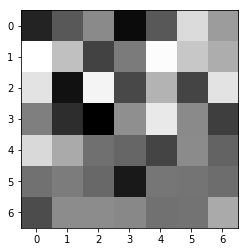

In [10]:
plt.imshow(X[2000].reshape((28,28)), cmap='Greys')
plt.figure()
plt.imshow(X_pca[2000].reshape((7,7)), cmap='Greys')

Doesn't look great reducing the dimensions. It's hard to see exactly what the figure are. But you can still kind of make out the the outline of the numbers in the reduced dimensions figures, especially for the second two figures.

# 2. T-SNE

Plotting the first two components

Getting a random sample of points

In [11]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

T-SNE for the first two componens

In [12]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

Creating a data frame of the first two components after being fit with T-SNE. Using the random observations as selected above.

In [13]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Plotting the clusters for the data using the first two components

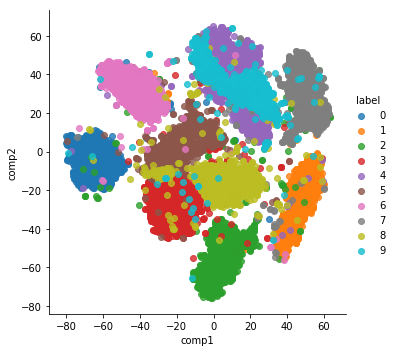

In [14]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

### a. Different from PCA plot

This plot is different from the PCA plot because it has shifted the points so that they are in more defined clusters, while still trying to preserve the local distance (distance between close points) and the global distance (distance between points that are far away)

### b. Change in perxplexity

I'll use t-sne to plot perplexities of 5 and 30, holding everything else the same as it was in my first plot to test the robustness to changes in perplexity.

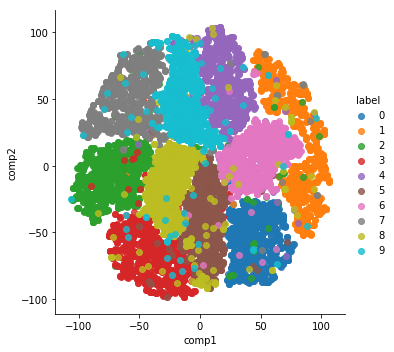

In [15]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

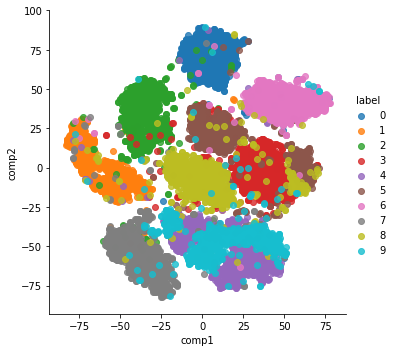

In [16]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

The clusters look closer together for lower perplexities. This makes sense because lower perplexities emphasize preserving local distance while higher perplexities emphasize preserving global distance. The different plots do, however, all look like they are able to decently well separate the data into clusters. This indicates decent robustness with respect to varying perplexities.

### c. Changes in Learning Rate and Iterations

I'll try two different learning rates (holding other hyperparameters constant) to see how the plot changes with differnt learning rates

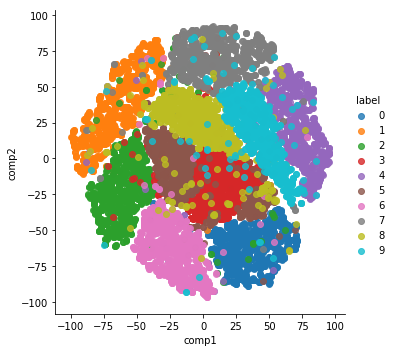

In [17]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

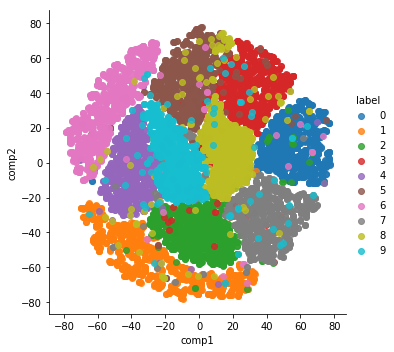

In [18]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

The plots for the different learning rates don't look all that different. The clusters are moved around in different ways but their sizes and distances from one another look pretty similar. This indicates robustness to changes in the learning rate

Checking the robustness with regards to the number of iterations. Trying two different values while holding the other hyperparameters constant.

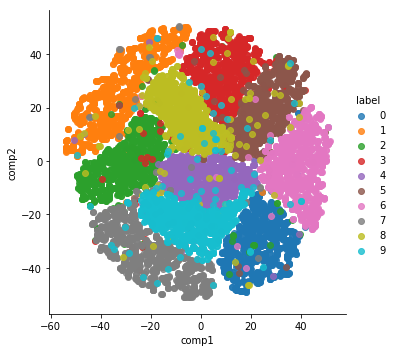

In [19]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=500, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

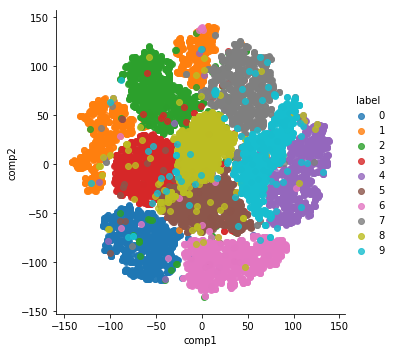

In [20]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=1500, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

The plots for different numbers of iterations also look fairly similar in terms of size of clusters and distances from other clusters. This indicates robustness with respect to the number of iterations.

# 3. K-Means Clustering

In [21]:
kmeans_model = KMeans(n_clusters=10, n_init=50, n_jobs=-1).fit(X)
labels = kmeans_model.labels_

### a. Choosing k

I chose k to be 10 beacuse I have prior knowledge that there are 10 different groups in the data (there are 10 unique digits). I'll us the elbow method with a plot to confirm that 10 is a good idea for k. This method plots the sum of squared distances. I will choose the k value that has an elbow in the graph.

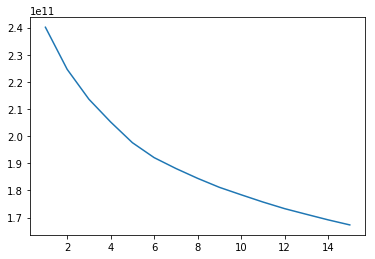

In [22]:
sses = []
for k in range(1,16):
    kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    kmeans.fit(X)
    sses.append(kmeans.inertia_)
plt.plot(range(1,16), sses)

There's a pretty clear elbow at 5 but there's enough of something at 10 where I could convince myself that there is an elbow there. 

### b. Evaluation of Clustering

Since I have the labels for the data, I could in theory evaluate that way. Assuming I don't have the labels, I will use the Silhouette Coefficient. This is calculated by looking at the distances between a point and the mean distance between all points in the next nearest cluster minus the mean distance between all the points of the point's cluster.

In [23]:
silhouette_score(X, labels, metric='euclidean')

0.05861729033057694

### c. Visualizing Clusters

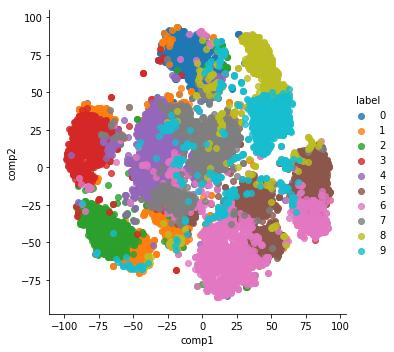

In [24]:
tsne = TSNE(n_components=2, perplexity=25, n_iter=1500, learning_rate=100)
tsne_results = tsne.fit_transform(X[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = labels[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

### d. Scaling?

I did not scale the data because each feature is already on the same scale because they are each representing the same size pixels.

### e. Robustness of Clustering

The plot doesn't look incredibly robust. There are kind of distinct clusters, but there is a lot more overlapping of clusters than in the previous t-sne plots.

# Hierarchical Clustering

### a. Dendrogram

Since there are 70000 observations and I don't want to plot all of them, I will only take the first 100.

In [25]:
X_dendo = X[:100]

Text(0.5, 1.0, 'Complete Dendrogram')

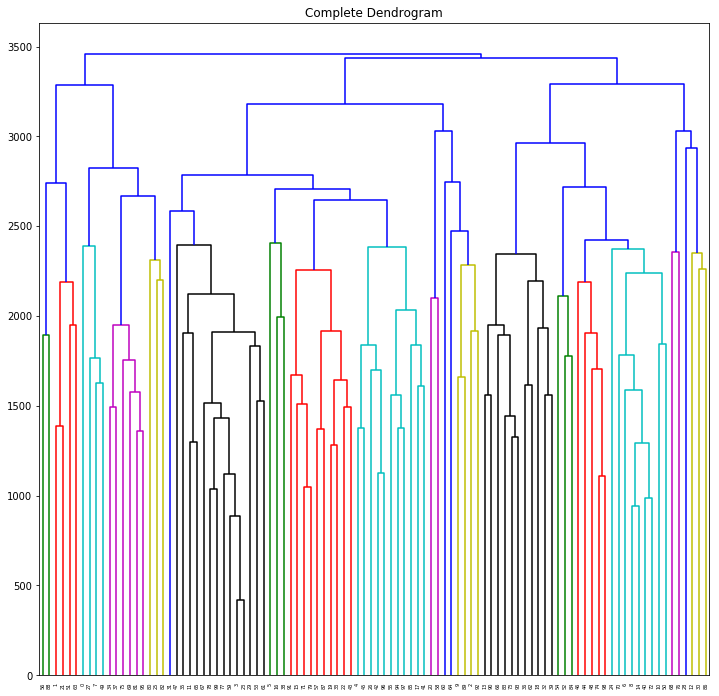

In [26]:
Z = linkage(X_dendo, 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Complete Dendrogram')

### b. Number of Reasonable Clusters

It looks like there are 10 distinct clusters if I cut off around the 2800/2900 mark. This is the number of clusters I'd expect, knowing what I know about the data.

### c. Different Linkage Methods

Text(0.5, 1.0, 'Ward Dendrogram')

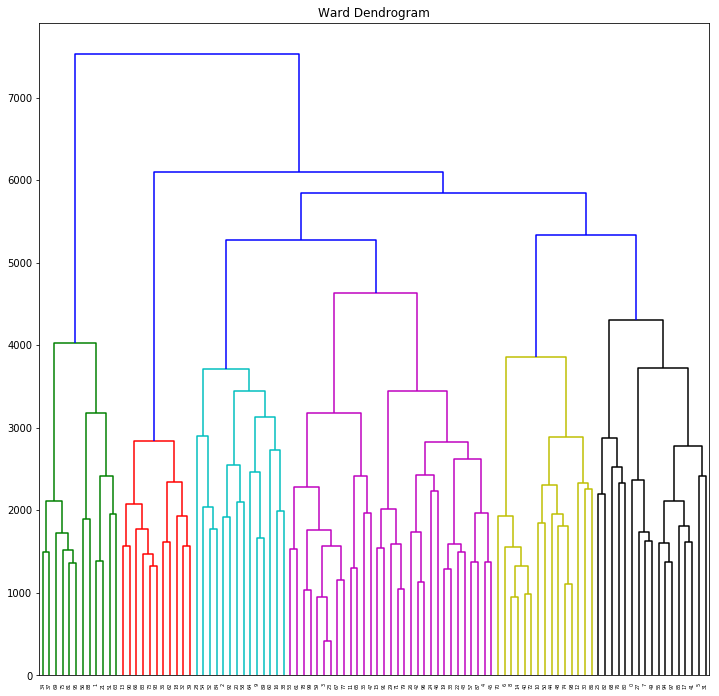

In [27]:
Z = linkage(X_dendo, 'ward')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Ward Dendrogram')

Text(0.5, 1.0, 'Average Dendrogram')

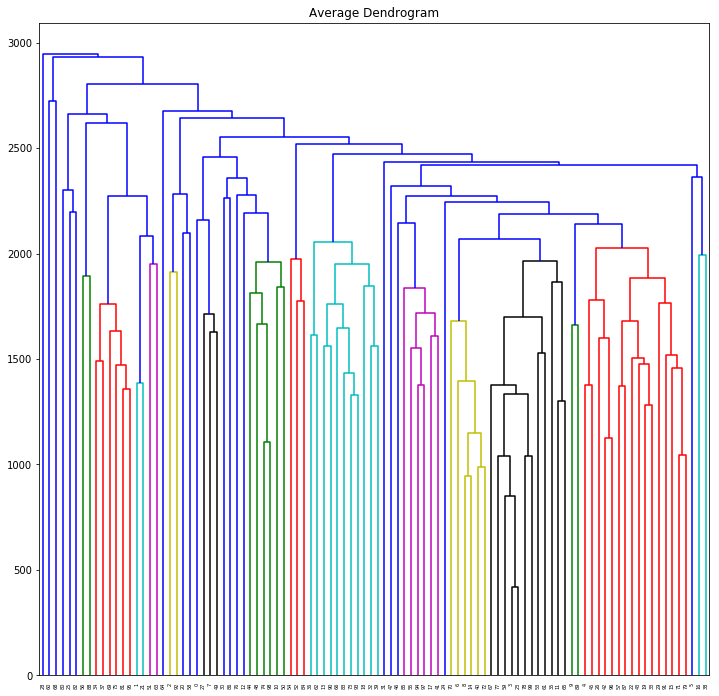

In [28]:
Z = linkage(X_dendo, 'average')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)
plt.title('Average Dendrogram')

In the ward linkage method, there are more splits higher up on the dendrogram. There is also a big break between the upper and lower cutoffs, with cutoffs not happening very frequently for a while going down the graph. For the average dendrogram, the splits look like they are all happening incrementally, starting on the left side rather than even splits down the middle. The average splits also appear to start a little lower on the graph. The complete linkage is less extreme and begins splitting below where the ward does, and above where the average does.